# INSTALLATION

In [1]:
!pip install spacy
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
###Execute below command through anaconda command prompt
!python -m spacy download en

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-03-24 23:03:11.839259: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-24 23:03:12.986343: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-24 23:03:12.986442: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open share

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [4]:
import pandas
dataset=pd.read_csv("/content/crocs.txt", error_bad_lines = False)

<ipython-input-4-d969b95b1c91>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  dataset=pd.read_csv("/content/crocs.txt", error_bad_lines = False)


In [5]:
dataset

,x
0,My old crocs were worn and didn't have any tre...
1,I always put a hold on purchasing these becaus...
2,I have had about 6-7 different pairs of these ...
3,"Not sure if it’s only in Hawaii, but this youn..."
4,Look no further! I'm just back here reminiscin...
5,I’ve got vinyl flooring laid on concrete. Sure...
6,I bought these to wear on a vacation to Cabo. ...
7,"hey look embarrassing to wear for me, but my l..."
8,My son and I went to the Crocs store and they ...
9,This review is long overdue but better late th...


In [6]:
# clean-up of the dataset
dataset = [x.strip() for x in dataset.x] # remove both the leading and the trailing characters
dataset = [x for x in dataset if x] # removes empty strings, because they are considered in Python as False
dataset[0:10]

["My old crocs were worn and didn't have any tread on the bottom anymore, decided to buy a new pair and I am glad I did. I forgot how much grip a new pair of crocs has, if you intend to use crocs for boating of any kind, new tread makes a world of difference. This pair of crocs is nearly identical to crocs Ive owned in the past, if it isn't broken don't fix it right? If you are looking for a comfortable shoe that can be easily slipped on look no further than the classic crocs.",
 'I always put a hold on purchasing these because I never liked the way they looked and the price was just too expensive for me. This time around it was different, I did not care about how ugly or funny they looked or how much they cost, but I just wanted some shoes to give me support, make my feet feel less pain and discomfort for standing and for walking. I will share with you my experience with my first and last pair of crocs.',
 "I have had about 6-7 different pairs of these throughout the years in multiple

In [7]:
dataset

["My old crocs were worn and didn't have any tread on the bottom anymore, decided to buy a new pair and I am glad I did. I forgot how much grip a new pair of crocs has, if you intend to use crocs for boating of any kind, new tread makes a world of difference. This pair of crocs is nearly identical to crocs Ive owned in the past, if it isn't broken don't fix it right? If you are looking for a comfortable shoe that can be easily slipped on look no further than the classic crocs.",
 'I always put a hold on purchasing these because I never liked the way they looked and the price was just too expensive for me. This time around it was different, I did not care about how ugly or funny they looked or how much they cost, but I just wanted some shoes to give me support, make my feet feel less pain and discomfort for standing and for walking. I will share with you my experience with my first and last pair of crocs.',
 "I have had about 6-7 different pairs of these throughout the years in multiple

In [8]:
# Joining the list into one string/text
text = ' '.join(dataset)
text

"My old crocs were worn and didn't have any tread on the bottom anymore, decided to buy a new pair and I am glad I did. I forgot how much grip a new pair of crocs has, if you intend to use crocs for boating of any kind, new tread makes a world of difference. This pair of crocs is nearly identical to crocs Ive owned in the past, if it isn't broken don't fix it right? If you are looking for a comfortable shoe that can be easily slipped on look no further than the classic crocs. I always put a hold on purchasing these because I never liked the way they looked and the price was just too expensive for me. This time around it was different, I did not care about how ugly or funny they looked or how much they cost, but I just wanted some shoes to give me support, make my feet feel less pain and discomfort for standing and for walking. I will share with you my experience with my first and last pair of crocs. I have had about 6-7 different pairs of these throughout the years in multiple differen

In [9]:
#Punctuation
no_punc_text = text.translate(str.maketrans('', '', string.punctuation))
no_punc_text

'My old crocs were worn and didnt have any tread on the bottom anymore decided to buy a new pair and I am glad I did I forgot how much grip a new pair of crocs has if you intend to use crocs for boating of any kind new tread makes a world of difference This pair of crocs is nearly identical to crocs Ive owned in the past if it isnt broken dont fix it right If you are looking for a comfortable shoe that can be easily slipped on look no further than the classic crocs I always put a hold on purchasing these because I never liked the way they looked and the price was just too expensive for me This time around it was different I did not care about how ugly or funny they looked or how much they cost but I just wanted some shoes to give me support make my feet feel less pain and discomfort for standing and for walking I will share with you my experience with my first and last pair of crocs I have had about 67 different pairs of these throughout the years in multiple different colors They are 

In [10]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50])

['My', 'old', 'crocs', 'were', 'worn', 'and', 'didnt', 'have', 'any', 'tread', 'on', 'the', 'bottom', 'anymore', 'decided', 'to', 'buy', 'a', 'new', 'pair', 'and', 'I', 'am', 'glad', 'I', 'did', 'I', 'forgot', 'how', 'much', 'grip', 'a', 'new', 'pair', 'of', 'crocs', 'has', 'if', 'you', 'intend', 'to', 'use', 'crocs', 'for', 'boating', 'of', 'any', 'kind', 'new', 'tread']


In [12]:
len(text_tokens)

2422

In [13]:
#Remove stopwords
from nltk.corpus import stopwords

my_stop_words = stopwords.words('english')
my_stop_words.append('the')
my_stop_words.append('Its')

no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40])

['My', 'old', 'crocs', 'worn', 'didnt', 'tread', 'bottom', 'anymore', 'decided', 'buy', 'new', 'pair', 'I', 'glad', 'I', 'I', 'forgot', 'much', 'grip', 'new', 'pair', 'crocs', 'intend', 'use', 'crocs', 'boating', 'kind', 'new', 'tread', 'makes', 'world', 'difference', 'This', 'pair', 'crocs', 'nearly', 'identical', 'crocs', 'Ive', 'owned']


In [14]:
#Normalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:25])

['my', 'old', 'crocs', 'worn', 'didnt', 'tread', 'bottom', 'anymore', 'decided', 'buy', 'new', 'pair', 'i', 'glad', 'i', 'i', 'forgot', 'much', 'grip', 'new', 'pair', 'crocs', 'intend', 'use', 'crocs']


In [15]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['my', 'old', 'croc', 'worn', 'didnt', 'tread', 'bottom', 'anymor', 'decid', 'buy', 'new', 'pair', 'i', 'glad', 'i', 'i', 'forgot', 'much', 'grip', 'new', 'pair', 'croc', 'intend', 'use', 'croc', 'boat', 'kind', 'new', 'tread', 'make', 'world', 'differ', 'thi', 'pair', 'croc', 'nearli', 'ident', 'croc', 'ive', 'own']


In [16]:
# lemmas being one of them, but mostly POS, which will follow later
nlp = spacy.load('en_core_web_sm')
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40])

My old crocs worn didnt tread bottom anymore decided buy new pair I glad I I forgot much grip new pair crocs intend use crocs boating kind new tread makes world difference This pair crocs nearly identical crocs I


In [17]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['my', 'old', 'croc', 'wear', 'do', 'not', 'tread', 'bottom', 'anymore', 'decide', 'buy', 'new', 'pair', 'I', 'glad', 'I', 'I', 'forget', 'much', 'grip', 'new', 'pair', 'croc', 'intend', 'use']


# FEATURE EXTRACTION

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [19]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=False).head(20)

,0
young,544
you,543
yk,542
yes,541
year,540
yard,539
ya,538
write,537
would,536
worse,535


In [20]:
print(vectorizer.vocabulary_)

{'my': 297, 'old': 316, 'croc': 101, 'wear': 514, 'do': 130, 'not': 307, 'tread': 490, 'bottom': 58, 'anymore': 27, 'decide': 114, 'buy': 68, 'new': 302, 'pair': 331, 'glad': 192, 'forget': 177, 'much': 294, 'grip': 200, 'intend': 244, 'use': 502, 'boat': 56, 'kind': 253, 'make': 275, 'world': 533, 'difference': 119, 'this': 479, 'nearly': 299, 'identical': 234, 've': 506, 'own': 326, 'past': 332, 'be': 46, 'break': 62, 'fix': 169, 'right': 378, 'if': 235, 'look': 268, 'comfortable': 89, 'shoe': 404, 'easily': 137, 'slip': 416, 'classic': 78, 'always': 21, 'put': 363, 'hold': 222, 'purchase': 360, 'never': 301, 'like': 263, 'way': 512, 'price': 352, 'expensive': 155, 'time': 484, 'around': 34, 'different': 120, 'care': 71, 'ugly': 498, 'funny': 182, 'cost': 97, 'want': 509, 'give': 191, 'support': 459, 'foot': 175, 'feel': 164, 'less': 260, 'pain': 329, 'discomfort': 125, 'stand': 439, 'walk': 508, 'share': 400, 'experience': 156, 'first': 167, 'last': 256, '67': 4, 'throughout': 482, 

In [22]:
print(vectorizer.get_feature_names_out()[50:100])
print(X.toarray()[50:100])

['because' 'become' 'bf' 'big' 'bit' 'black' 'boat' 'boot' 'bottom'
 'bounce' 'boy' 'brand' 'break' 'bring' 'brooks' 'bummer' 'but'
 'butterfly' 'buy' 'cabo' 'call' 'care' 'case' 'cause' 'change' 'charm'
 'choose' 'christmas' 'classic' 'clean' 'clever' 'click' 'clog' 'clothe'
 'clutch' 'collect' 'color' 'come' 'comfort' 'comfortable' 'common'
 'complain' 'concrete' 'condition' 'contrary' 'correct' 'corsage' 'cost'
 'could' 'couple']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [23]:
print(X.toarray().shape)

(1380, 545)


# INCLUDING BIGRAMS AND TRIGRAMS

In [24]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(dataset)

In [25]:
bow_matrix_ngram

<24x100 sparse matrix of type '<class 'numpy.int64'>'
	with 847 stored elements in Compressed Sparse Row format>

In [26]:
print(vectorizer_ngram_range.get_feature_names_out())
print(bow_matrix_ngram.toarray())

['about' 'all' 'and' 'and the' 'and they' 'any' 'are' 'around' 'as' 'at'
 'back' 'be' 'because' 'been' 'bought' 'but' 'buy' 'can' 'colors'
 'comfortable' 'crocs' 'didn' 'different' 'do' 'don' 'feet' 'first' 'fit'
 'for' 'get' 'got' 'great' 'had' 'has' 'have' 'he' 'his' 'if' 'in'
 'in the' 'is' 'it' 'just' 'last' 'like' 'looking' 'me' 'more' 'much' 'my'
 'my feet' 'never' 'new' 'no' 'not' 'of' 'of crocs' 'of the' 'on' 'on my'
 'on the' 'or' 'other' 'out' 'pair' 'pair of' 'pair of crocs' 'pairs'
 'shoes' 'size' 'so' 'still' 'that' 'the' 'them' 'these' 'they' 'they are'
 'they were' 'this' 'time' 'to' 'to get' 'to wear' 'too' 've' 'walking'
 'was' 'we' 'wear' 'wear them' 'wearing' 'were' 'when' 'which' 'will'
 'with' 'would' 'years' 'you']
[[0 0 2 ... 0 0 2]
 [1 0 4 ... 0 0 1]
 [1 0 2 ... 2 1 1]
 ...
 [0 0 4 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]]


#### TFidf VECTORIZER

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 10)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(dataset)
print(vectorizer_n_gram_max_features.get_feature_names_out())
print(tf_idf_matrix_n_gram_max_features.toarray())

['and' 'are' 'for' 'in' 'my' 'of' 'the' 'them' 'they' 'to']
[[0.2696747  0.16534522 0.29231934 0.16534522 0.14615967 0.66138088
  0.42110941 0.         0.         0.38862118]
 [0.54602633 0.         0.44390721 0.         0.44390721 0.16739213
  0.28421505 0.         0.42632258 0.13114405]
 [0.15200575 0.27959713 0.32953942 0.09319904 0.         0.37279618
  0.63297054 0.         0.39560659 0.29206871]
 [0.45070436 0.13816982 0.24427505 0.27633965 0.12213753 0.
  0.58649627 0.47139602 0.11729925 0.21649944]
 [0.40745666 0.4996465  0.11041772 0.         0.11041772 0.12491163
  0.63626226 0.         0.31813113 0.19572506]
 [0.52089092 0.12774921 0.         0.12774921 0.         0.25549842
  0.65071605 0.         0.21690535 0.40034258]
 [0.33548082 0.13712854 0.12121707 0.         0.12121707 0.27425709
  0.46566105 0.6237913  0.23283052 0.32230177]
 [0.20574372 0.12614732 0.11151003 0.         0.3345301  0.6307366
  0.53546376 0.28691911 0.10709275 0.19766128]
 [0.60196843 0.         0.271

# GENERATE WORD CLOUD

In [28]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

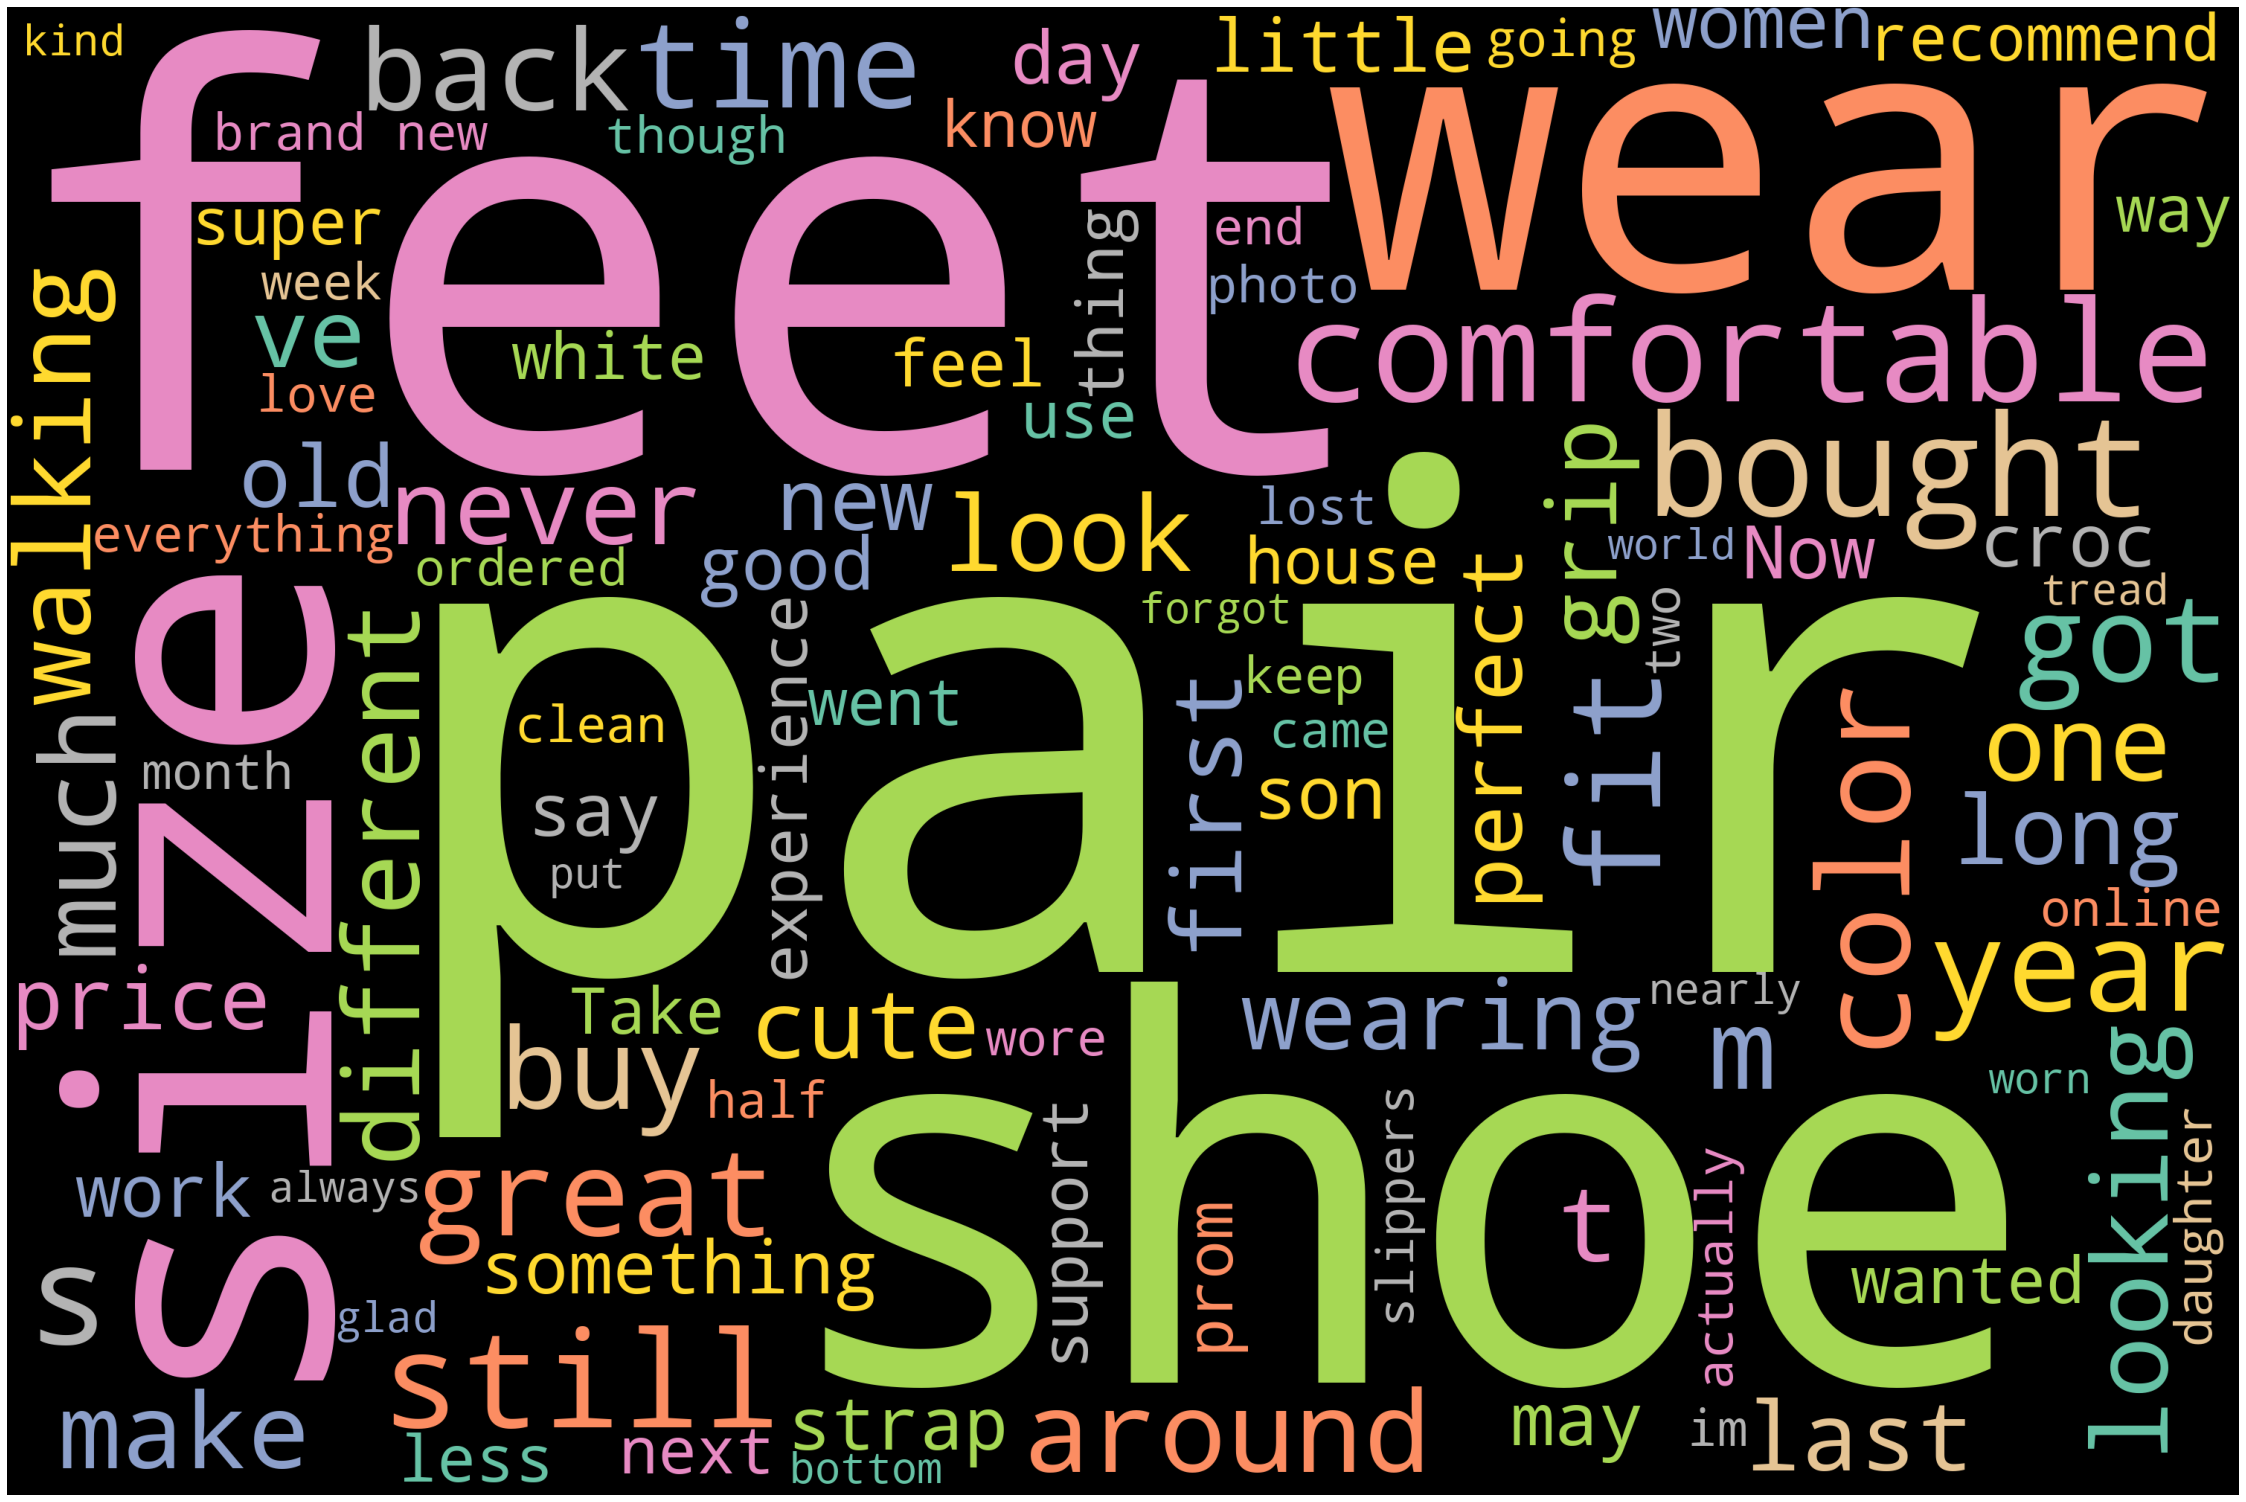

In [30]:
#  Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
stopwords.add('ugly')
stopwords.add('Amazon')
stopwords.add('crocs')

wordcloud = WordCloud(width = 3000, height = 2000, 
                      background_color='black', max_words=100,
                      colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

# NAMED ENTITY RECOGNITION

In [31]:
nlp = spacy.load('en_core_web_sm')

one_block = dataset[5]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [32]:
one_block

'I’ve got vinyl flooring laid on concrete. Sure, Crocs are like the girl you may have never asked to the prom- but then you got to know her and you realize you have more in common that you would have ever thought. She too likes the comforting sounds of Stix and Ambrosia. Next thing ya know you’re pinning on a corsage and arm and arm you March through the doors of the prom. Why you ask? Because COMFORT. Looks aren’t everything. Personality goes a long way. Do Crocs/can Crocs have personality? I would argue yes because it the way they make your feet feel. Less pained, less strained and they give you a bounce to your step which makes walking on hard floors painless. So Crocs- will you go to prom with me?'

In [33]:
for token in doc_block[0:45]:
    print(token, token.pos_)

I PRON
’ve AUX
got VERB
vinyl NOUN
flooring VERB
laid VERB
on ADP
concrete NOUN
. PUNCT
Sure ADV
, PUNCT
Crocs PROPN
are AUX
like ADP
the DET
girl NOUN
you PRON
may AUX
have AUX
never ADV
asked VERB
to ADP
the DET
prom- NOUN
but CCONJ
then ADV
you PRON
got VERB
to PART
know VERB
her PRON
and CCONJ
you PRON
realize VERB
you PRON
have VERB
more ADJ
in ADP
common ADJ
that SCONJ
you PRON
would AUX
have AUX
ever ADV
thought VERB


In [34]:
#Filtering for nouns and verbs only
adj_verbs = [token.text for token in doc_block if token.pos_ in ('ADJ', 'VERB')]
print(adj_verbs[5:25])

['know', 'realize', 'have', 'more', 'common', 'thought', 'likes', 'comforting', 'Next', 'know', 'pinning', 'arm', 'ask', 'goes', 'long', 'have', 'argue', 'make', 'feel', 'pained']


In [35]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(adj_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df

,word,count
0,got,2
1,know,2
2,have,2
3,flooring,1
4,laid,1
5,asked,1
6,realize,1
7,more,1
8,common,1
9,thought,1


<Axes: title={'center': 'Top verbs and adj'}, xlabel='word'>

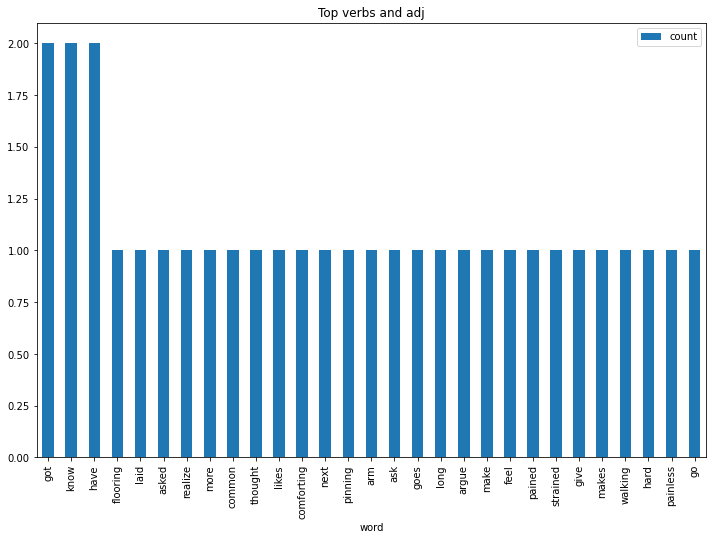

In [36]:
##Visualizing results
 #Barchart for top 10 nouns + verbs
wf_df.plot.bar(x='word', figsize=(12,8), title='Top verbs and adj')

# EMOTION MINING

In [37]:
#Sentiment analysis
afinn = pd.read_csv('/content/Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [38]:
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [39]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

import pandas
book=pd.read_csv("/content/crocs.txt",error_bad_lines=False)
book = [x.strip() for x in book.x] # remove both the leading and the trailing characters
book = [x for x in book if x] # removes empty strings, because they are considered in Python as False

<ipython-input-39-27db6c3f4eb7>:12: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  book=pd.read_csv("/content/crocs.txt",error_bad_lines=False)


In [40]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [41]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(book))
sentences[5:15]

['This time around it was different, I did not care about how ugly or funny they looked or how much they cost, but I just wanted some shoes to give me support, make my feet feel less pain and discomfort for standing and for walking.',
 'I will share with you my experience with my first and last pair of crocs.',
 'I have had about 6-7 different pairs of these throughout the years in multiple different colors.',
 'They are perfect for a variety of situations.',
 'They can be used as shower shoes, beach/pool shoes, house shoes, yard shoes, and more.',
 'The only problem with these is the grip on the bottom.',
 'You would think that since they are rubber they have great grip, but this is not the case.',
 'The grip is average when they are brand new, but quickly gets worse and worse due to the soft rubber of the sole.',
 "This is not a huge deal for me as I don't wear these shoes for anything too intense, but something to note.",
 'I would still recommend these to anybody looking for an ext

In [42]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,My old crocs were worn and didn't have any tre...
1,I forgot how much grip a new pair of crocs has...
2,This pair of crocs is nearly identical to croc...
3,If you are looking for a comfortable shoe that...
4,I always put a hold on purchasing these becaus...
...,...
150,"I have small, narrow feet with a high arch."
151,"Every time I've tried on Crocs, I felt like my..."
152,With the strap on the heel I can actually keep...
153,"They are great for what I purchased them for, ..."


In [43]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [44]:
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [45]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        print(sentence)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [46]:
# test that it works
calculate_sentiment(text = 'Ugly')

Ugly


-3

In [47]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

My old crocs were worn and didn't have any tread on the bottom anymore, decided to buy a new pair and I am glad I did.
I forgot how much grip a new pair of crocs has, if you intend to use crocs for boating of any kind, new tread makes a world of difference.
This pair of crocs is nearly identical to crocs Ive owned in the past, if it isn't broken don't fix it right?
If you are looking for a comfortable shoe that can be easily slipped on look no further than the classic crocs.
I always put a hold on purchasing these because I never liked the way they looked and the price was just too expensive for me.
This time around it was different, I did not care about how ugly or funny they looked or how much they cost, but I just wanted some shoes to give me support, make my feet feel less pain and discomfort for standing and for walking.
I will share with you my experience with my first and last pair of crocs.
I have had about 6-7 different pairs of these throughout the years in multiple different

In [48]:
sent_df

,sentence,sentiment_value
0,My old crocs were worn and didn't have any tre...,3
1,I forgot how much grip a new pair of crocs has...,1
2,This pair of crocs is nearly identical to croc...,0
3,If you are looking for a comfortable shoe that...,1
4,I always put a hold on purchasing these becaus...,2
...,...,...
150,"I have small, narrow feet with a high arch.",0
151,"Every time I've tried on Crocs, I felt like my...",2
152,With the strap on the heel I can actually keep...,0
153,"They are great for what I purchased them for, ...",3


In [49]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10)

0    26
1    29
2    22
3    21
4    25
5    45
6    15
7    16
8     8
9    15
Name: word_count, dtype: int64

In [50]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value,word_count
88,I was pleased to get them in one of my favorit...,5,12
104,"They are light, feet my foot great, and have g...",6,11
110,I would recommend sizing down as crocs do tend...,6,33
19,It’s a super great price so I would definitely...,6,25
145,She has wide feet and they were just perfect a...,6,23
146,I love crocs they are great for many occasions...,6,23
127,"made a diy beaded as well, it fits pretty good...",7,41
122,(Jibbitz in photo not included) Purchased as a...,7,21
109,These crocs are so cute and they’re the perfec...,8,20
126,"i didn't like crocs at first, but once i saw p...",9,21


In [51]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    155.000000
mean       1.032258
std        2.461177
min       -6.000000
25%        0.000000
50%        0.000000
75%        2.000000
max        9.000000
Name: sentiment_value, dtype: float64

In [52]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head()

,sentence,sentiment_value,word_count
2,This pair of crocs is nearly identical to croc...,0,22
7,I have had about 6-7 different pairs of these ...,0,16
9,"They can be used as shower shoes, beach/pool s...",0,15
10,The only problem with these is the grip on the...,-2,11
12,"The grip is average when they are brand new, b...",-6,23


In [53]:
sent_df[sent_df['sentiment_value']<-5].head()['sentence'].tolist()[0]

'The grip is average when they are brand new, but quickly gets worse and worse due to the soft rubber of the sole.'

In [54]:
sent_df['index']=range(0,len(sent_df))

<ipython-input-55-6e3dcf195c51>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sent_df['sentiment_value'])


<Axes: xlabel='sentiment_value', ylabel='Density'>

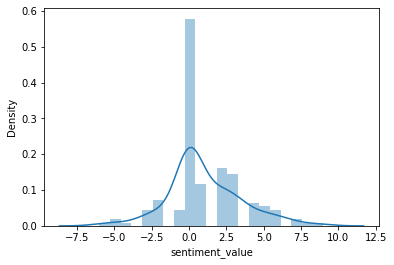

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

<Axes: xlabel='index', ylabel='sentiment_value'>

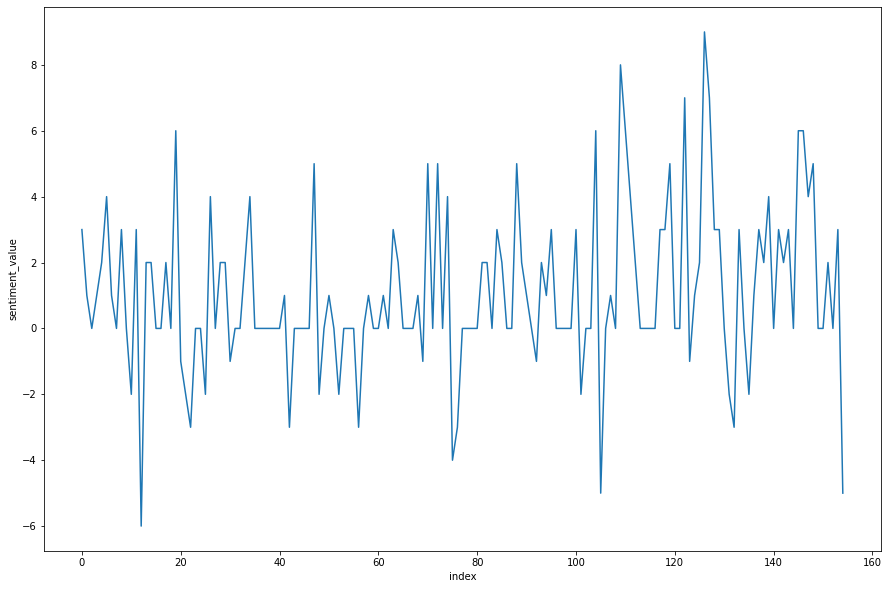

In [56]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: title={'center': 'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

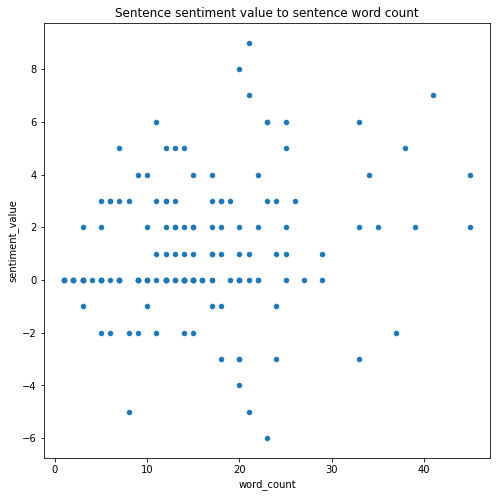

In [57]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')